In [1]:
# data process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [27]:
import pint

In [28]:
ureg = pint.UnitRegistry()

In [3]:
with open('f1.dat') as f:
    data = []
    tmp = []
    for line in f:
        line = line.strip()
        if line == '':
            data.append(np.array(tmp))
            tmp = []
            continue
        x, y = line.strip().split()
        tmp.append((float(x), - float(y)))
    data.append(tmp)

In [4]:
zero_px = data[2][0]
y_max_px = data[0][1,1] - zero_px[1]
x_max_px = data[0][2,0] - zero_px[0]

In [5]:
data[2][:,0] - data[2][:,0][0]

array([  0. ,  95.5, 191. , 569.5])

In [6]:
lin_setp = 6/569.5

In [7]:
x_max_px * lin_setp

6.998244073748903

In [14]:
def scele_log_10(v, d_min, d_max):
    d_min = np.log10(d_min)
    d_max = np.log10(d_max)
    return 10**(v * (d_max - d_min) + d_min)

In [15]:
def scale_linear(v, d_min, d_max):
    return v * (d_max - d_min) + d_min

In [52]:
coordinates = []
for d in data[3:]:
    d = (d - zero_px)/(x_max_px, y_max_px)
    x = scale_linear(d[:,0], 9, 16)
    y = scele_log_10(d[:,1], 10**-10, 10**-1)
    coordinates.append(np.vstack([x,y]).T)

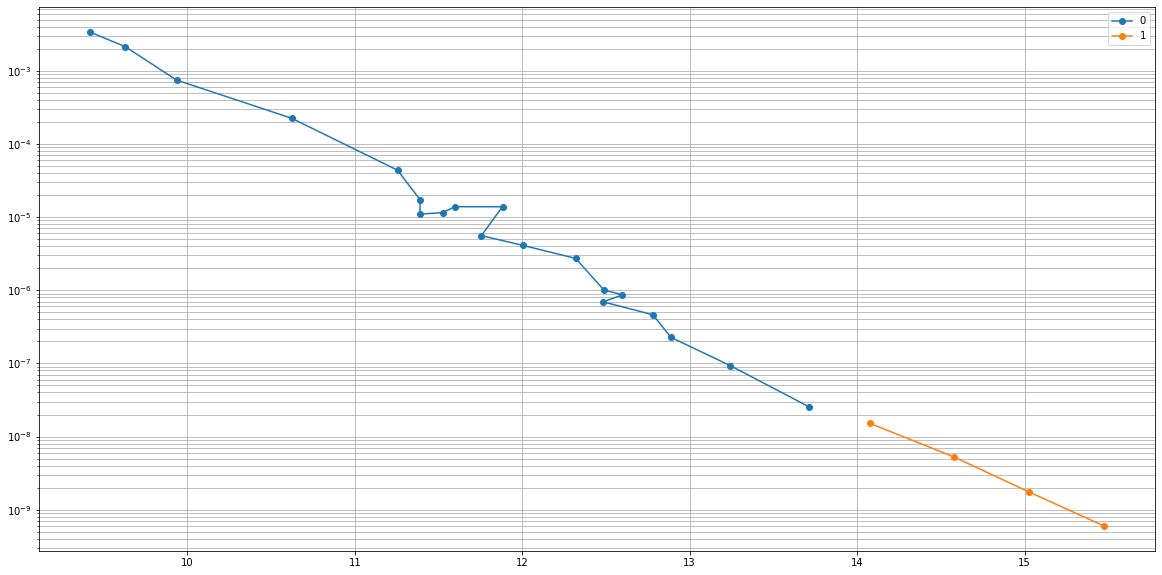

In [76]:
fig, ax = plt.subplots(1,1, figsize=(20,10), sharex=False)
for idx, d in enumerate(coordinates):
    ax.plot(d[:,0],d[:,1], 'o-', label=idx)
ax.set_yscale('log')
ax.grid(which='both')
ax.legend()

In [30]:
import pandas as pd

In [78]:
dfs = []
for a, b in zip(coordinates, ['olson88', 'csepregi']):
    tmp = a.copy()
    x = tmp[:,0] * ureg.boltzmann_constant / ureg.electron_volt
    y = tmp[:,1] * ureg.cm/ureg.sec
    y = y.to(ureg.nanometer/ureg.picosec).magnitude
    x =(1/x).to(ureg.kelvin).magnitude
    tmp[:,0]= x
    tmp[:,1]= y
    df = pd.DataFrame(tmp, columns=['t','v'])
    df['pot'] = b
    dfs.append(df)

In [79]:
df = pd.concat(dfs, ignore_index=True)

In [80]:
df

t             v       pot
0   1232.391568  3.411520e-08   olson88
1   1205.081085  2.138247e-08   olson88
2   1168.012904  7.496447e-09   olson88
3   1092.407605  2.249174e-09   olson88
4   1031.038443  4.384373e-10   olson88
5   1018.875311  1.732720e-10   olson88
6   1018.875311  1.099108e-10   olson88
7   1006.995808  1.153054e-10   olson88
8   1000.590772  1.388307e-10   olson88
9    976.630599  1.388307e-10   olson88
10   987.136374  5.586114e-11   olson88
11   966.770283  4.115768e-11   olson88
12   941.960854  2.722520e-11   olson88
13   929.242779  1.007347e-11   olson88
14   921.081543  8.672619e-12   olson88
15   929.635018  6.948763e-12   olson88
16   907.980583  4.624118e-12   olson88
17   900.370993  2.267208e-12   olson88
18   876.366559  9.343729e-13   olson88
19   846.229132  2.547237e-13   olson88
20   824.373152  1.512756e-13  csepregi
21   796.065389  5.271878e-14  csepregi
22   772.200773  1.740810e-14  csepregi
23   749.852979  5.958604e-15  csepregi

In [81]:
df.to_csv('f1.csv')

In [22]:
with open('f2.dat') as f:
    data = []
    tmp = []
    for line in f:
        line = line.strip()
        if line == '':
            data.append(np.array(tmp))
            tmp = []
            continue
        x, y = line.strip().split()
        tmp.append((float(x), - float(y)))
    data.append(tmp)

In [23]:
zero_px = data[0][0]
y_max_px = data[0][1,1] - zero_px[1]
x_max_px = data[0][2,0] - zero_px[0]

In [24]:
coordinates = []
for d in data[1:]:
    d = (d - zero_px)/(x_max_px, y_max_px)
    x = scale_linear(d[:,0], 6, 18)
    y = scele_log_10(d[:,1], 10**-10, 10**-0)
    coordinates.append(np.vstack([x,y]).T)

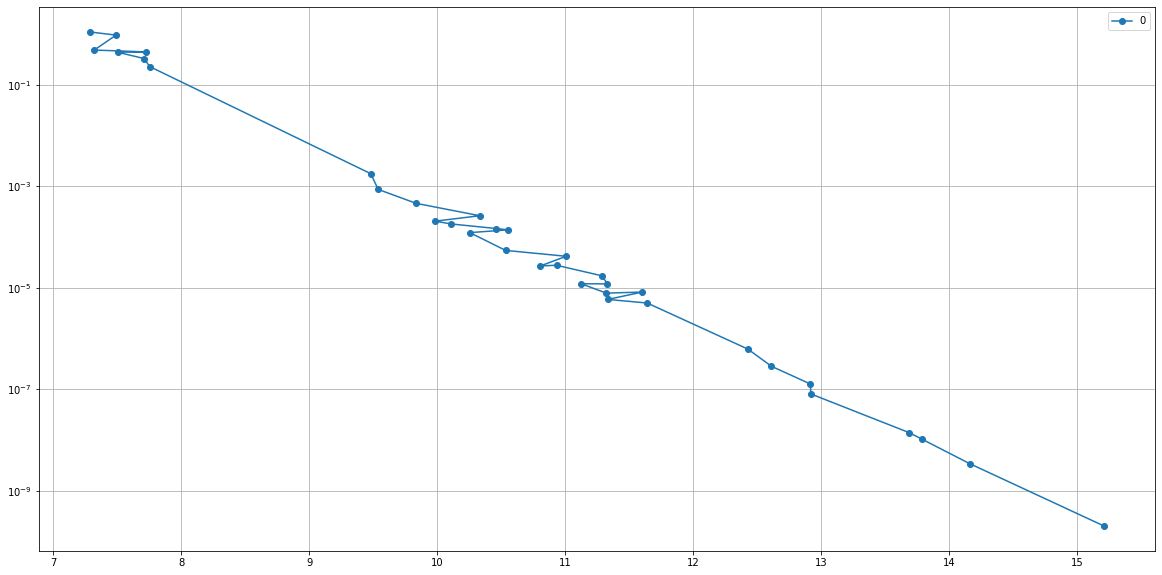

In [25]:
fig, ax = plt.subplots(1,1, figsize=(20,10), sharex=False)
for idx, d in enumerate(coordinates):
    ax.plot(d[:,0],d[:,1], 'o-', label=idx)
ax.set_yscale('log')
ax.grid(which='both')
ax.legend()

In [31]:
dfs = []
for a, b in zip(coordinates, ['SiAs']):
    tmp = a.copy()
    x = tmp[:,0] * ureg.boltzmann_constant / ureg.electron_volt
    y = tmp[:,1] * ureg.cm/ureg.sec
    y = y.to(ureg.nanometer/ureg.picosec).magnitude
    x =(1/x).to(ureg.kelvin).magnitude
    tmp[:,0]= x
    tmp[:,1]= y
    df = pd.DataFrame(tmp, columns=['t','v'])
    df['pot'] = b
    dfs.append(df)

In [32]:
df = pd.concat(dfs, ignore_index=True)

In [33]:
df.to_csv('f2.csv')